In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
denis = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\Denis_Mukwege.jpg',0)
nadia = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\Nadia_Murad.jpg',0)
solvay = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\solvay_conference.jpg',0)

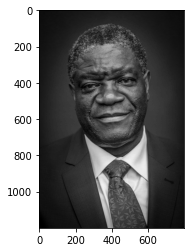

In [3]:
plt.imshow(denis, cmap='gray')

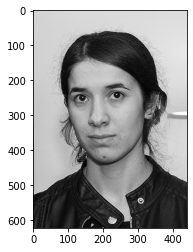

In [4]:
plt.imshow(nadia, cmap='gray')

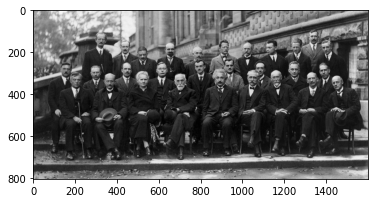

In [5]:
plt.imshow(solvay, cmap='gray')

## Face

In [6]:
face_cascade = cv2.CascadeClassifier('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_frontalface_default.xml')

In [7]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    count = 0
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 5)
        count += 1
    return face_img

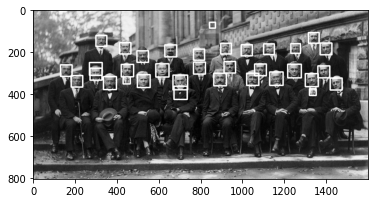

In [8]:
result= detect_face(solvay)
plt.imshow(result, 'gray')

In [9]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.1,  minNeighbors=5)
    count = 0
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 5)
        count += 1
    return face_img

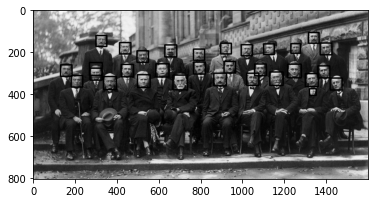

In [10]:
result= adj_detect_face(solvay)
plt.imshow(result, 'gray')

## Eyes

In [11]:
eyes_cascade = cv2.CascadeClassifier('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\haarcascades\haarcascade_eye.xml')

In [12]:
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eyes_cascade.detectMultiScale(face_img, scaleFactor=1.1,  minNeighbors=5)
    count = 0
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 5)
        count += 1
    return face_img

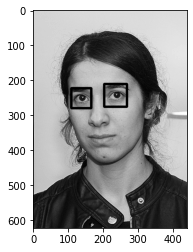

In [13]:
result= detect_eyes(nadia)
plt.imshow(result, 'gray')

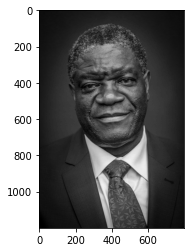

In [14]:
result= detect_eyes(denis)
plt.imshow(result, 'gray')

In [15]:
def blur_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.1,  minNeighbors=5)
    count = 0
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 2)
        roi = face_img[y:y+h, x:x+w]
        roi = cv2.medianBlur(roi, ksize=25)
        face_img[y:y+h, x:x+w] = roi
    return face_img

## Video

In [16]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = blur_face(frame)
    #frame = detect_eyes(frame)
    cv2.imshow('face detect', frame)

    k = cv2.waitKey(1)
    if k == 27: break

cap.release()
cv2.destroyAllWindows()